## Split the final datset into train/test sets

In [104]:
import glob
import os
import shutil
import random
from pathlib import Path
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split

SEED = 1234
def set_seed(seed=SEED):
    np.random.seed(seed) 
    random.seed(seed)
set_seed()

In [105]:
final_dir = './diseases_final_small/'
split_dir = './diseases_final_small_split_400/'
# final_dir = './diseases_final_augmented_2k/'
# split_dir = './diseases_final_augmented_2k_split/'

metadata = pd.read_csv(os.path.join(final_dir, 'metadata.csv'))
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  16225 non-null  object
 1   label     16225 non-null  object
 2   variety   16225 non-null  object
 3   age       16225 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 507.2+ KB


In [106]:
metadata = metadata.groupby(['label']).apply(lambda x: x.sample(n=400, random_state=SEED)).reset_index(drop=True)
metadata.label.value_counts()

bacterial_leaf_blight       400
bacterial_leaf_streak       400
bacterial_panicle_blight    400
black_stem_borer            400
blast                       400
brown_spot                  400
downy_mildew                400
hispa                       400
leaf_roller                 400
normal                      400
tungro                      400
white_stem_borer            400
yellow_stem_borer           400
Name: label, dtype: int64

In [107]:
metadata

,image_id,label,variety,age
0,PDD00301.jpg,bacterial_leaf_blight,45,55
1,PDD00262.jpg,bacterial_leaf_blight,45,72
2,PDD00157.jpg,bacterial_leaf_blight,45,55
3,PDD00570.jpg,bacterial_leaf_blight,45,55
4,PDD00451.jpg,bacterial_leaf_blight,45,65
...,...,...,...,...
5195,PDD15584.jpg,yellow_stem_borer,AndraPonni,65
5196,PDD15864.jpg,yellow_stem_borer,45,70
5197,PDD15884.jpg,yellow_stem_borer,45,70
5198,PDD15898.jpg,yellow_stem_borer,45,70


In [108]:
## test_size= 0.2793 to get 10k samples in train
train, test = train_test_split(metadata, random_state=SEED, test_size= 0.2,
                               stratify = metadata[['label']])
                               #stratify = metadata[['label', 'variety']])
train = train.sort_values(by=['image_id', 'label'])
test  = test.sort_values(by=['image_id', 'label'])
print(metadata.shape, train.shape, test.shape)

(5200, 4) (4160, 4) (1040, 4)


#### copy train images

In [109]:
for index, row in tqdm(train.iterrows()):
    from_path = os.path.join(final_dir, row['label'], row['image_id'])
    to_dir    = os.path.join(split_dir, 'train',  row['label'])
    to_path   = os.path.join(to_dir, row['image_id'])
    
    if not os.path.exists(to_dir):
        os.makedirs(to_dir)
    shutil.copy(from_path, to_path)
    #print(from_path, to_path, os.path.exists(from_path))

4160it [00:06, 622.01it/s]


#### copy test images

In [110]:
for index, row in tqdm(test.iterrows()):
    from_path = os.path.join(final_dir, row['label'], row['image_id'])
    to_dir    = os.path.join(split_dir, 'test',  row['label'])
    to_path   = os.path.join(to_dir, row['image_id'])
    
    if not os.path.exists(to_dir):
        os.makedirs(to_dir)
    shutil.copy(from_path, to_path)
    #print(from_path, to_path, os.path.exists(from_path))

1040it [00:01, 581.34it/s]


#### save the metadata files

In [111]:
train.to_csv(os.path.join(split_dir, 'metadata-train.csv'), index=False)
test.to_csv(os.path.join(split_dir, 'metadata-test.csv'), index=False)

#combined metadata
train['split'] = 'train'
test['split'] = 'test'
metadata_split = pd.concat([train, test])
metadata_split = metadata_split.sort_values(by=['image_id', 'label'])
metadata_split.to_csv(os.path.join(split_dir, 'metadata.csv'), index=False)
metadata_split.split.value_counts()

train    4160
test     1040
Name: split, dtype: int64

In [114]:
#!pip install seedir
#!pip install emoji
#!pip install seedir[emoji]
import emoji
#https://github.com/earnestt1234/seedir
import seedir as sd
sd.seedir(split_dir, style='lines', itemlimit=13, depthlimit=1, beyond='content')
#sd.seedir(split_dir, style='lines', itemlimit=15, depthlimit=2)

diseases_final_small_split_400/
├─metadata-test.csv
├─metadata-train.csv
├─metadata.csv
├─paddy-doctor-diseases-small-400-split.zip
├─test/
│ └─13 folder(s), 0 file(s)
└─train/
  └─13 folder(s), 0 file(s)


In [67]:
#sd.seedir(final_dir, style='lines', itemlimit=13, depthlimit=2)
sd.seedir(final_dir, style='lines', itemlimit=13, depthlimit=2)

diseases_final_small/
├─bacterial_leaf_blight/
│ ├─PDD00001.jpg
│ ├─PDD00002.jpg
│ ├─PDD00003.jpg
│ ├─PDD00004.jpg
│ ├─PDD00005.jpg
│ ├─PDD00006.jpg
│ ├─PDD00007.jpg
│ ├─PDD00008.jpg
│ ├─PDD00009.jpg
│ ├─PDD00010.jpg
│ ├─PDD00011.jpg
│ ├─PDD00012.jpg
│ └─PDD00013.jpg
├─bacterial_leaf_streak/
│ ├─PDD00649.jpg
│ ├─PDD00650.jpg
│ ├─PDD00651.jpg
│ ├─PDD00652.jpg
│ ├─PDD00653.jpg
│ ├─PDD00654.jpg
│ ├─PDD00655.jpg
│ ├─PDD00656.jpg
│ ├─PDD00657.jpg
│ ├─PDD00658.jpg
│ ├─PDD00659.jpg
│ ├─PDD00660.jpg
│ └─PDD00661.jpg
├─bacterial_panicle_blight/
│ ├─PDD01154.jpg
│ ├─PDD01155.jpg
│ ├─PDD01156.jpg
│ ├─PDD01157.jpg
│ ├─PDD01158.jpg
│ ├─PDD01159.jpg
│ ├─PDD01160.jpg
│ ├─PDD01161.jpg
│ ├─PDD01162.jpg
│ ├─PDD01163.jpg
│ ├─PDD01164.jpg
│ ├─PDD01165.jpg
│ └─PDD01166.jpg
├─black_stem_borer/
│ ├─PDD01604.jpg
│ ├─PDD01605.jpg
│ ├─PDD01606.jpg
│ ├─PDD01607.jpg
│ ├─PDD01608.jpg
│ ├─PDD01609.jpg
│ ├─PDD01610.jpg
│ ├─PDD01611.jpg
│ ├─PDD01612.jpg
│ ├─PDD01613.jpg
│ ├─PDD01614.jpg
│ ├─PDD01615.jpg
│ └─PDD01616.

### descriptive stats

45                10978
KarnatakaPonni     1404
Ponni               975
AtchayaPonni        706
Zonal               649
AndraPonni          615
Onthanel            585
IR20                235
Surya                42
RR                   36
Name: variety, dtype: int64


<AxesSubplot:>

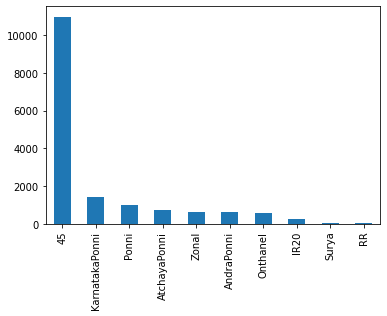

In [21]:
print(metadata.variety.value_counts())
metadata.variety.value_counts().plot(kind='bar')

70    4945
60    2527
50    1748
65    1410
75    1243
55     907
72     774
45     756
67     608
68     390
57     326
80     276
47     149
77      61
73      50
66      48
62       7
Name: age, dtype: int64


<AxesSubplot:>

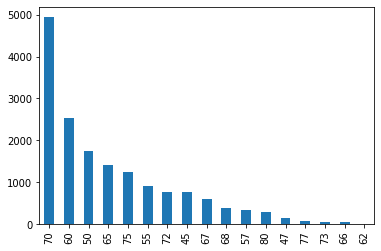

In [22]:
print(metadata.age.value_counts())
metadata.age.value_counts().plot(kind='bar')

In [23]:
metadata['label'].value_counts() / metadata['label'].shape[0]

normal                      0.148228
blast                       0.144900
hispa                       0.132573
tungro                      0.120247
white_stem_borer            0.078459
brown_spot                  0.077473
leaf_roller                 0.067488
downy_mildew                0.053498
yellow_stem_borer           0.047149
bacterial_leaf_blight       0.039938
black_stem_borer            0.031186
bacterial_leaf_streak       0.031125
bacterial_panicle_blight    0.027735
Name: label, dtype: float64

In [24]:
train['label'].value_counts() / train['label'].shape[0]
#test['label'].value_counts() / train['label'].shape[0]

normal                      0.148228
blast                       0.144915
hispa                       0.132512
tungro                      0.120262
white_stem_borer            0.078505
brown_spot                  0.077350
leaf_roller                 0.067488
downy_mildew                0.053467
yellow_stem_borer           0.047227
bacterial_leaf_blight       0.039908
bacterial_leaf_streak       0.031202
black_stem_borer            0.031202
bacterial_panicle_blight    0.027735
Name: label, dtype: float64

In [25]:
# ## https://stackoverflow.com/questions/53997862/pandas-groupby-two-columns-and-plot
# train.groupby(['label', 'variety'])['image_id'].count().plot(kind='bar', figsize=(16,6))

In [26]:
# cols = ['label', 'variety']
# #train[['label', 'variety', 'age']].groupby(cols).count().plot.bar()
# train.groupby(cols).count().unstack('variety').plot.bar()
# #.plot(kind='bar', figsize=(16,6))

In [27]:
#pd.crosstab(train['label'],train['variety']).plot(kind='barh', figsize=(8,12))